<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/Tensorflow_BurnDown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten,Conv2D

Load and prepare the mnist dataset

In [38]:
mnist = tf.keras.datasets.mnist

#Split the dataset 
(x_train,y_train),(x_test,y_test) = mnist.load_data()
#Normalize the data for effective computation
x_train,x_test = x_train/255.0,x_test/255.0

#Add a channel's dimension
x_test = x_test[...,tf.newaxis].astype("float32")
x_train = x_train[...,tf.newaxis].astype("float32")

#Batch and Shuffle the dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(1000).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(32)

In [39]:
for image,labels in train_dataset.take(1):
  print(image.shape)
  break

(32, 28, 28, 1)


In [40]:
x_train[0].shape

(28, 28, 1)

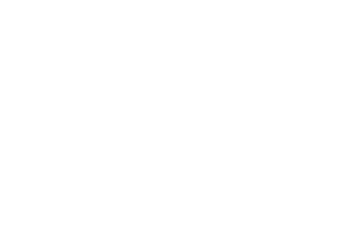

In [41]:
import matplotlib.pyplot as plt
for images,labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3,3, i + 1)  
    plt.axis("off")
    #plt.imshow(images[i].numpy().astype("uint8"))    

In [42]:
#Build the Keras model using the subclassing API
class ModelOne(tf.keras.Model):
  def __init__(self):
    super(ModelOne,self).__init__()
    self.conv1 = tf.keras.layers.Conv2D(64,3)
    self.activ1 = tf.keras.layers.Activation("elu")
    self.flatten = tf.keras.layers.Flatten()
    self.batchNorm = tf.keras.layers.BatchNormalization()
    self.dense1  = tf.keras.layers.Dense(128,activation = "relu", kernel_initializer="he_normal")
    self.dense2 = tf.keras.layers.Dense(10)

  def call(self,x):
    x = self.conv1(x)
    x = self.activ1(x)
    x = self.flatten(x)
    x = self.batchNorm(x)
    x = self.dense1(x)
    x = self.dense2(x)
    return x 



#Create an instance of the model
model = ModelOne()


In [43]:
#Define the hyperparameters by choosing a loss function to measures the perfomance of the model, choose a learning algorithm/optimizer that will minimize the cost function

#Loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam() #Could take a learning rate

Select the loss to measure the loss and accuracy of the model 

In [44]:
from tensorflow.python.ops.gradients_impl import gradients
train_loss = tf.keras.metrics.Mean(name="train_loss")
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name="train_Accuracy")

test_loss = tf.keras.metrics.Mean( name = "test_loss")
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name="training_accuracy")

#Define the training function
@tf.function
def train_step(images,labels):
  with tf.GradientTape() as tape:

    predictions = model(images,training=True)
    loss = loss_fn(labels,predictions)
  gradients = tape.gradient(loss,model.trainable_variables)
  optimizer.apply_gradients(zip(gradients,model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels,predictions)


@tf.function
def test_step(images,labels):
  #No gradient checking so we do not utilise Gradient Tape
  predictions = model(images,training=False) 
  loss = loss_fn(labels,predictions)

  test_loss(loss)
  test_accuracy(labels,predictions)

In [ ]:
#Train the models
EPOCHS = 5
for epoch in range(EPOCHS):
  #Reset the states
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  #Loops over the training data and pass the images to the training loop
  for image,labels in train_dataset:
    train_step(image,labels)
  for image,labels in test_dataset:
    test_step(image,labels)
  
    print(f"EPOCHS:{epoch + 1}\n")
    print(f"train_loss:{train_loss.result()}\n")
    print(f"train_accuracy:{train_accuracy.result()}")
    print(f"test_loss:{test_loss.result()}")
    print(f"test_accuracy:{test_accuracy.result()}")

Scratch

In [46]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import pandas as pd

In [73]:
#Load the dataset
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

#Normalise the data
x_train,x_test = x_train/255.0,x_test/255.0

#Add a channel
x_train = x_train[...,tf.newaxis].astype("float32")
x_test = x_test[...,tf.newaxis].astype("float32")


#Convert to batch 
train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train)).shuffle(1000).batch(32)
test_dataset  = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(32)

In [77]:
for image,labels in train_dataset:
  print(image.shape)
  break

(32, 28, 28, 1)


In [66]:
#Build the model
class NeuralNetwork(tf.keras.Model):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.conv1 = tf.keras.layers.Conv2D(64,kernel_size=(2,2),strides=(1,1),padding = "same",kernel_initializer="he_normal") 
    self.activ1 = tf.keras.layers.Activation("elu")
    self.maxpool = tf.keras.layers.MaxPooling2D((2,2))
    self.flatten = tf.keras.layers.Flatten()
    self.batchNorm = tf.keras.layers.BatchNormalization()
    self.dense1 = tf.keras.layers.Dense(64,kernel_initializer="he_normal")
    self.activ2 = tf.keras.layers.Activation("elu")
    self.output1 = tf.keras.layers.Dense(10) #10 classes

  def call(self,x):
    x = self.conv1(x)
    x = self.activ1(x)
    x = self.maxpool(x)
    x = self.flatten(x)
    x = self.batchNorm(x)
    x = self.dense1(x)
    x = self.activ2(x)
    x = self.output1(x)
    return x

#Create an instance of the model
model = NeuralNetwork()

In [81]:
#Define the hyperparameters
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
optimizer = tf.keras.optimizers.Adam()

train_loss = tf.keras.metrics.Mean(name ="train_loss")
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name="train_accuracy")


test_loss = tf.keras.metrics.Mean(name="test_loss")
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name="testing Accuracy")



#Define the training loop
@tf.function
def train_step(images,labels):
  with tf.GradientTape() as tape:
    #Enable gradient checking
    #Get the predictions
    predictions = model(images,training=True)
    loss = loss_fn(labels,predictions)

  gradients = tape.gradient(loss,model.trainable_variables)
  optimizer.apply_gradients(zip(gradients,model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels,predictions)

@tf.function
def test_step(images,labels):
  predictions = model(images,training = False)
  loss = loss_fn(labels,predictions)

  test_loss(loss)
  test_accuracy(labels,predictions)

In [82]:
EPOCHS = 10


for epoch in range(EPOCHS):
  #Reset the metrics
  train_loss.reset_states()
  train_accuracy.reset_states()

  
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images,labels in train_dataset:
    train_step(images,labels)

  for images, labels in test_dataset:
    test_step(images,labels)

  print(f"Epoch: {epoch + 1}")
  print(f"Training Accuracy:{train_accuracy.result()}")
  print(f"Train Loss: {train_loss.result()}")
  print(f"Test Loss: {test_loss.result()}")
  print(f"Test Accuracy:{test_accuracy.result()}")

Epoch: 1
Training Accuracy:0.9505333304405212
Train Loss: 0.17604874074459076
Test Loss: 0.9865314364433289
Test Accuracy:0.8022000193595886
Epoch: 2
Training Accuracy:0.9761166572570801
Train Loss: 0.0764571875333786
Test Loss: 0.13124211132526398
Test Accuracy:0.9652000069618225
Epoch: 3
Training Accuracy:0.9820166826248169
Train Loss: 0.05853157863020897
Test Loss: 0.31219908595085144
Test Accuracy:0.9276000261306763
Epoch: 4
Training Accuracy:0.9847666621208191
Train Loss: 0.05067784711718559
Test Loss: 0.1064484566450119
Test Accuracy:0.9754999876022339
Epoch: 5
Training Accuracy:0.9868000149726868
Train Loss: 0.04282517358660698
Test Loss: 0.22366255521774292
Test Accuracy:0.9513999819755554
Epoch: 6
Training Accuracy:0.9884666800498962
Train Loss: 0.036847759038209915
Test Loss: 0.15849044919013977
Test Accuracy:0.9728000164031982
Epoch: 7
Training Accuracy:0.9908333420753479
Train Loss: 0.029142921790480614
Test Loss: 0.12789933383464813
Test Accuracy:0.9753000140190125
Epoch: 